     x1   x2
0   600  200
1   750  150
2  1200  120
3  1000  140
4  2000  100
5   500  210


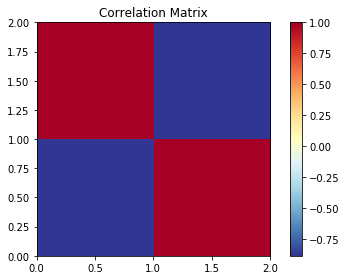

         r value p-value  N
x1 & x2  -0.8843  0.0193  6


In [1]:
# 연습문제 5-2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.api as smg
import researchpy as rp
from scipy import stats
df = pd.read_csv('C:/gskim/P4DS/data/ex52.csv')
print(df)
corr_matrix=np.corrcoef(df.T)
smg.plot_corr(corr_matrix)
plt.show() 
np.corrcoef(df)
corr=df.corr(method='pearson')
print(rp.corr_pair(df[['x1', 'x2']]))


In [2]:
# 연습문제 5-3-1
import numpy as np
import pandas as pd
df = pd.read_csv('C:/gskim/P4DS/data/diabetes.csv')
df.info()
#---check for null values---
print("Nulls")
print("=====")
print(df.isnull().sum())
#---check for 0s---
print("0s")
print("==")
print(df.eq(0).sum())

df[['Glucose','BloodPressure','SkinThickness',
    'Insulin','BMI','DiabetesPedigreeFunction','Age']] = \
    df[['Glucose','BloodPressure','SkinThickness',
        'Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN)
df.fillna(df.mean(), inplace = True)   # replace NaN with the mean
print(df.eq(0).sum())
corr = df.corr()
print(corr)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Nulls
=====
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age               

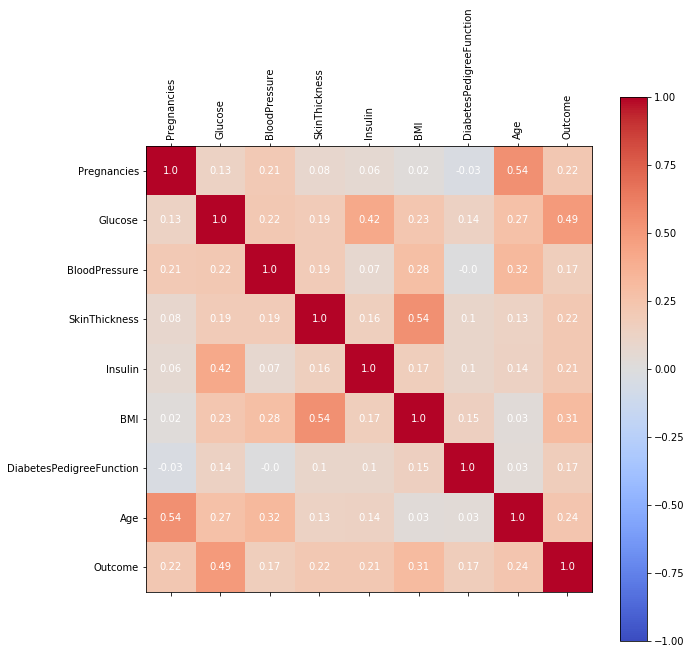

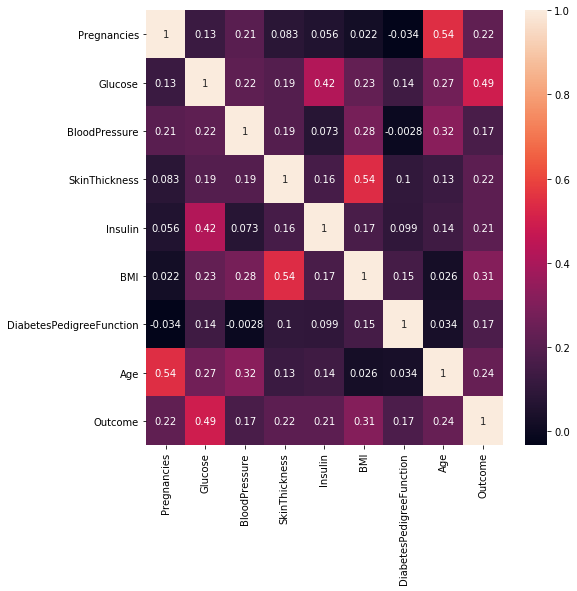

In [3]:
# 연습문제 5-3-2
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
cax     = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)

fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)

ax.set_xticklabels(df.columns)
plt.xticks(rotation = 90)

ax.set_yticklabels(df.columns)
ax.set_yticks(ticks)

#---print the correlation factor---
for i in range(df.shape[1]):
    for j in range(9):
        text = ax.text(j, i, round(corr.iloc[i][j],2),
                       ha="center", va="center", color="w")

plt.show()

import seaborn as sns

sns.heatmap(df.corr(),annot=True)

#---get a reference to the current figure and set its size---
fig = plt.gcf()
fig.set_size_inches(8,8)

In [4]:
# 연습문제5-5
from sklearn.cross_decomposition import CCA
import numpy as np
X = [[0., 0., 1.], [1.,0.,0.], [2.,2.,2.], [3.,5.,4.]]
Y = [[0.1, -0.2], [0.9, 1.1], [6.2, 5.9], [11.9, 12.3]]
cca = CCA(n_components=1)
cca.fit(X, Y)
X_c, Y_c = cca.transform(X, Y)
result = np.corrcoef(X_c.T, Y_c.T)[0,1]
print(result)

1.0
